# INTRODUCTION

In this project, the Breast Tissue Measurements dataset is being explored and analyzed through various stages of data analysis and clustering techniques. The project is structured into multiple notebooks, each focusing on different aspects and methodologies to provide a comprehensive understanding of the dataset and to derive meaningful insights.

## Previous Notebooks

1. **Exploratory Data Analysis (EDA)**:
   - This notebook focused on understanding the dataset's structure, distributions, and relationships between variables through detailed analysis and visualizations.
   - [Link to EDA Notebook](https://www.kaggle.com/code/tarktunataalt/exploring-breast-tissue-data-eda-insights)

2. **PCA and Distance Analysis**:
   - In this notebook, Principal Component Analysis (PCA) was applied to reduce the dimensionality of the dataset, and the appropriate distance metrics for clustering were determined.
   - [Link to PCA and Distance Analysis Notebook](https://www.kaggle.com/code/tarktunataalt/breast-tissue-pca-distance-analysis)

3. **K-Means Clustering**:
   - This notebook applied the K-Means clustering algorithm to the dataset, evaluated the optimal number of clusters using various methods, and analyzed the clustering solutions.
   - [Link to K-Means Clustering Notebook](https://www.kaggle.com/code/tarktunataalt/breast-tissue-k-means-cluster-analysis/notebook)

## Current Notebook

This notebook aims to apply the K-Medoids clustering algorithm to the dataset and determine the optimal number of clusters. The steps involved include:
- Using the Elbow Method, Silhouette Method, and Gap Statistic to evaluate the appropriate number of clusters.
- Visualizing the clustering results with different numbers of clusters.
- Analyzing the clustering solutions to identify the most meaningful and robust clustering configuration.

Based on the analyses, it has been concluded that K-Medoids clustering with \( k=4 \) will be evaluated further in the final notebook. The \( k=6 \) solution, however, will be excluded due to the presence of an outlier forming a single-point cluster, which is not meaningful for clustering analysis. The 5-cluster solution increases overlapping compared to the 4-cluster solution, while 7-clusters, although supported by three methods, results in a single-member cluster and thus is also not practical.

Note: The factoextra library, which is essential for some visualizations and analyses, is not available on Kaggle. Therefore, the code for these parts was executed locally and the results were uploaded. Those who wish to run the code themselves are advised to download and run it on their local machines.

## Future Notebooks

The subsequent notebooks will delve into various clustering techniques using the identified optimal settings:

1. **Hierarchical Clustering**:
   - Performing hierarchical clustering and visualizing the dendrogram to understand the clustering hierarchy.

2. **Hierarchical K-Means Clustering**:
   - Combining hierarchical clustering with K-Means to refine clusters for improved results.

3. **Model-Based Clustering**:
   - Using Gaussian Mixture Models (GMM) and other model-based techniques to analyze the data under different assumptions.

4. **Density-Based Clustering**:
   - Exploring density-based methods like DBSCAN to identify clusters based on data density.

5. **Selecting the Optimal Clustering Method**:
   - Comparing the results of different clustering techniques and using cluster validation metrics to select the best method.

Each notebook will build on the findings of the previous ones, ensuring a systematic and thorough analysis of the Breast Tissue Measurements dataset.


In [9]:
library(factoextra)
library(gridExtra)
library(cluster)

data <- read.csv("/kaggle/input/breast-tissue-impedance-measurements/data.csv")
data <- data[,2:10]


In [10]:
scaled_pca_data <- prcomp(data, center = TRUE, scale. = TRUE)
scaled_pca_data <- scaled_pca_data$x[,1:2]

# OPTIMAL NUMBER OF CLUSTERS FOR K-MEDOIDS

## Elbow Method

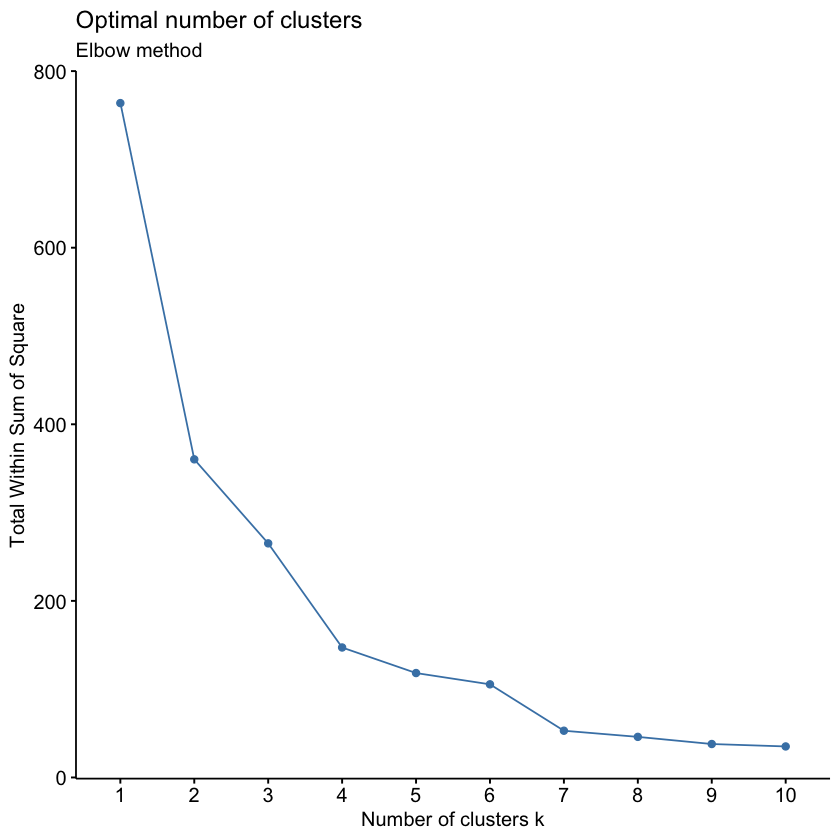

In [11]:
fviz_nbclust(scaled_pca_data,pam,method = "wss",nstart = 25)+
  labs(subtitle = "Elbow method")

The Elbow Method involves plotting the Total Within Sum of Squares (WSS) against the number of clusters (k) to identify the point where the rate of decrease sharply slows down, forming an "elbow." In the attached plot, two potential elbow points can be observed: at 4 clusters, where the WSS significantly decreases and the rate of decrease becomes more gradual, and at 7 clusters, where another change in the rate of decrease is noted. Based on this analysis, 4 and 7 clusters could be considered as potential optimal numbers of clusters for further evaluation.

## Silhouette Method

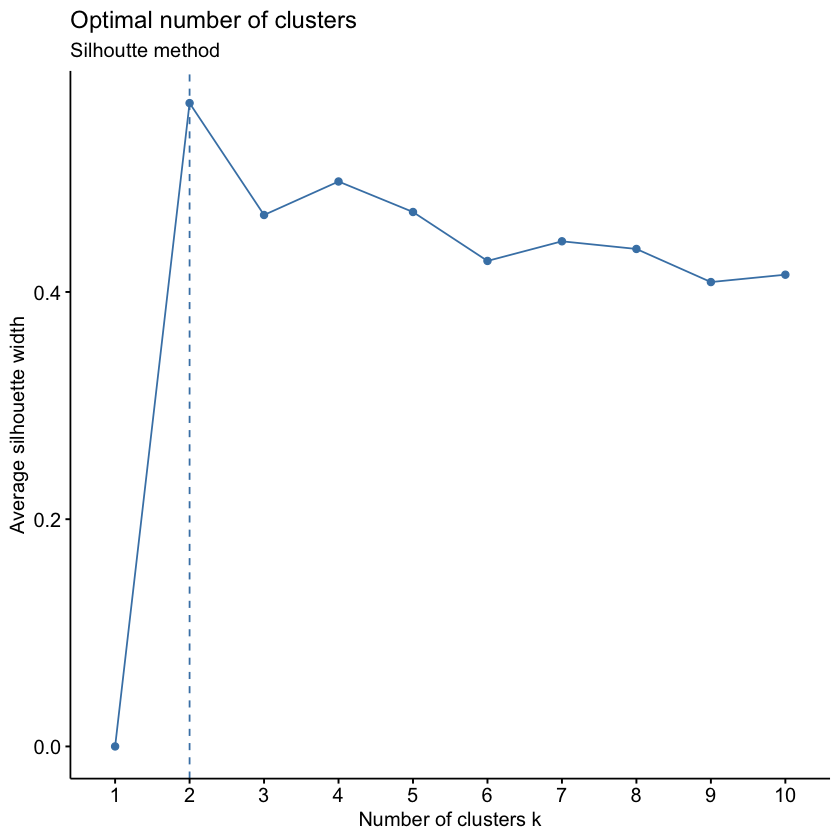

In [12]:
fviz_nbclust(scaled_pca_data,pam,method = "silhouette")+ #for average silhouette width
  labs(subtitle = "Silhoutte method")

The Silhouette Method measures how well each data point fits within its assigned cluster compared to other clusters. In the attached plot, the average silhouette width suggests that 2, 4, 5, and 7 clusters could be considered. However, it is important to note that the silhouette method often suggests 2 clusters due to its tendency to favor fewer clusters. Therefore, while 2 clusters is noted, more emphasis should be placed on 4, 5, and 7 clusters for further evaluation.

## Gap Statistic Method

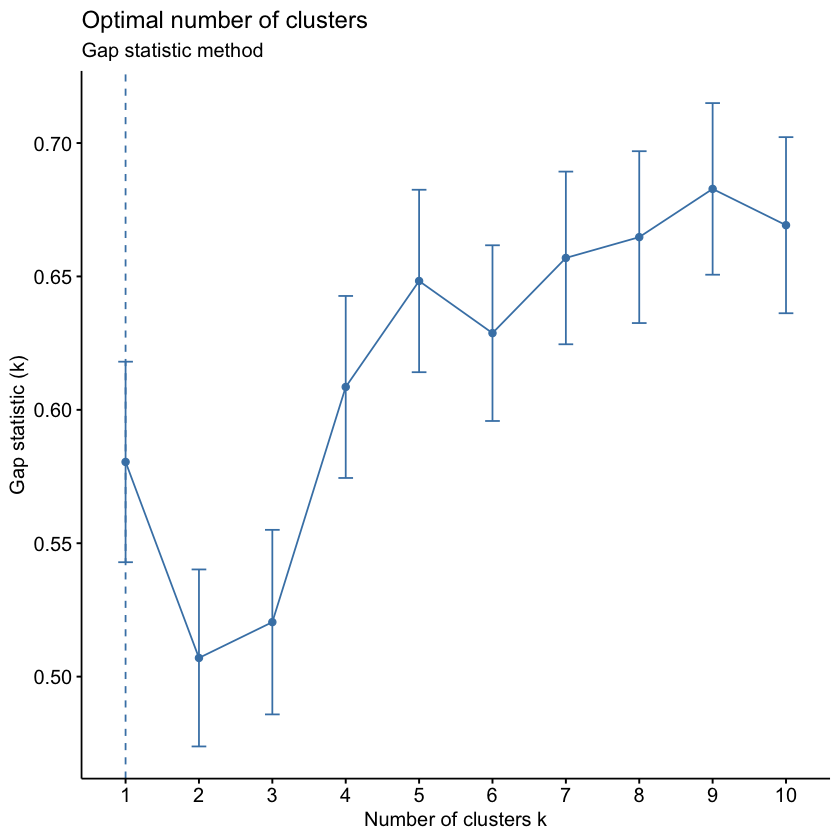

In [13]:
fviz_nbclust(scaled_pca_data, pam, nstart = 25,  method = "gap_stat", nboot = 500)+
  labs(subtitle = "Gap statistic method")

The Gap Statistic Method helps determine the optimal number of clusters by comparing the total within-cluster variation for different numbers of clusters with their expected values under a null reference distribution. In the attached plot, the gap statistic values suggest that 4, 5, 6, 7, 8, 9, and 10 clusters could be considered. These cluster numbers show relatively high and stable gap statistic values, indicating their potential suitability for further evaluation.

## General Conclusion

Based on the analyses from the three methods, the following conclusions can be drawn for determining the optimal number of clusters:

- **Elbow Method**: Suggested potential elbow points at 4 and 7 clusters.
- **Silhouette Method**: Indicated 2 (questionable), 4, 5, and 7 clusters as possible options.
- **Gap Statistic Method**: Recommended 4, 5, 6, 7, 8, 9, and 10 clusters.

Given the consensus among the three methods, clusters 4 and 7 will be evaluated further. Additionally, since both the Silhouette and Gap methods suggested 5 clusters, it will also be considered. Furthermore, due to the recommendation of 6 clusters by the Gap Statistic and its inclusion in the K-Means evaluation, it will also be tested.

Therefore, the clustering analysis will focus on observing the separation and characteristics of 4, 5, 6, and 7 clusters.

# K-MEDOIDS

## FOR 4 CLUSTERS


Warning message in MASS::cov.trob(data[, vars]):

“Probable convergence failure”


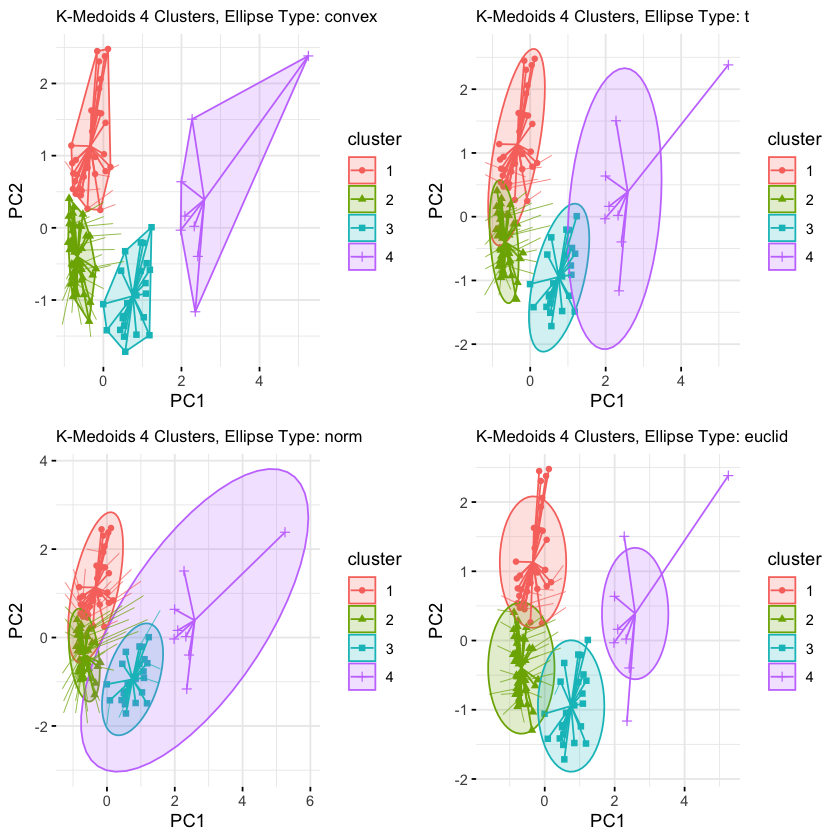

In [14]:
pam_res_4 <- pam(scaled_pca_data, 4, nstart=25) 
ellipse_types <- c("convex", "t", "norm", "euclid")
pam_4plots <- list()

for (etype in ellipse_types) {
  p <- fviz_cluster(pam_res_4, data = scaled_pca_data,
                    ellipse.type = etype, 
                    star.plot = TRUE, 
                    repel = TRUE, 
                    labelsize = 0, 
                    ggtheme = theme_minimal()
  ) + labs(title = paste("K-Medoids 4 Clusters, Ellipse Type:", etype)) +
      theme(plot.title = element_text(size = 10))
  pam_4plots[[etype]] <- p
}

grid.arrange(grobs = pam_4plots, ncol = 2)

The plots display the K-Medoids clustering results with 4 clusters using different types of ellipses (convex, t, norm, and euclid) to visualize the cluster boundaries.

Despite some overlapping between clusters, a reasonable level of separation is observed. The clusters exhibit distinct groupings, making the overall separation acceptable for further analysis. This suggests that using 4 clusters provides a meaningful clustering solution, even though perfect separation is not achieved.


## FOR 5 CLUSTERS


Warning message in MASS::cov.trob(data[, vars]):

“Probable convergence failure”


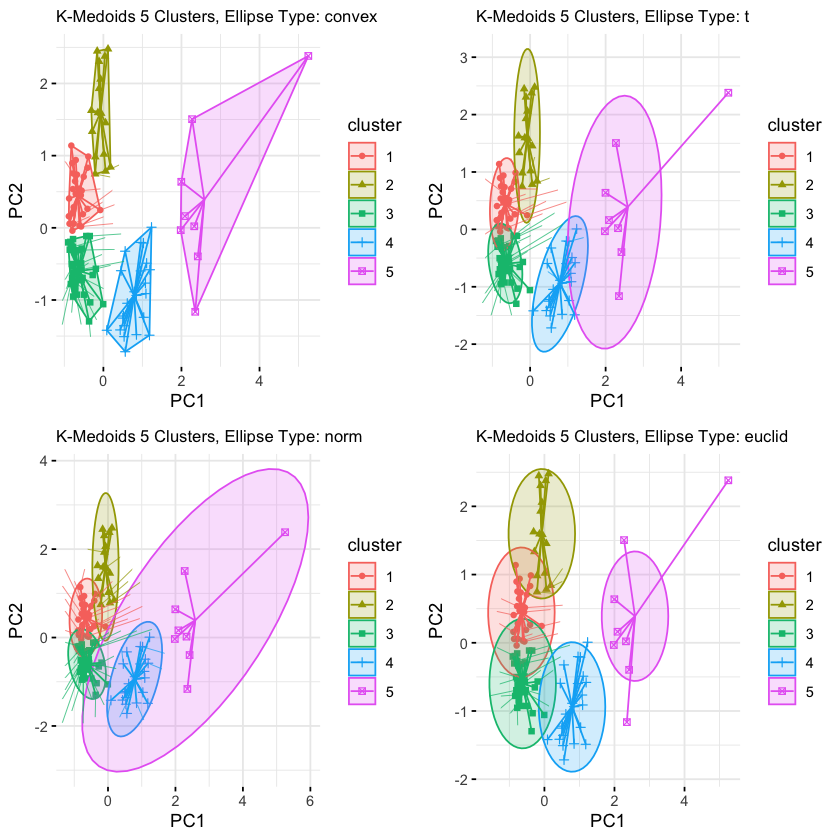

In [15]:
pam_res_5 <- pam(scaled_pca_data, 5, nstart=25) 
ellipse_types <- c("convex", "t", "norm", "euclid")
pam_5plots <- list()

for (etype in ellipse_types) {
  p <- fviz_cluster(pam_res_5, data = scaled_pca_data,
                    ellipse.type = etype, 
                    star.plot = TRUE, 
                    repel = TRUE, 
                    labelsize = 0, 
                    ggtheme = theme_minimal()
  ) + labs(title = paste("K-Medoids 5 Clusters, Ellipse Type:", etype)) +
      theme(plot.title = element_text(size = 10))
  pam_5plots[[etype]] <- p
}

grid.arrange(grobs = pam_5plots, ncol = 2)

The plots display the K-Medoids clustering results with 5 clusters using different types of ellipses (convex, t, norm, and euclid) to visualize the cluster boundaries.

Despite some overlapping between clusters, a reasonable level of separation is observed. The clusters exhibit distinct groupings, making the overall separation acceptable for further analysis. However, compared to the 4-cluster solution, the addition of the fifth cluster introduces additional overlapping. This increased overlap is a negative aspect, indicating more complexity in distinguishing between some clusters. While 5 clusters provide a meaningful clustering solution, the increased overlap compared to 4 clusters suggests potential issues with cluster distinction.


## FOR 6 CLUSTERS


Warning message in MASS::cov.trob(data[, vars]):

“Probable convergence failure”


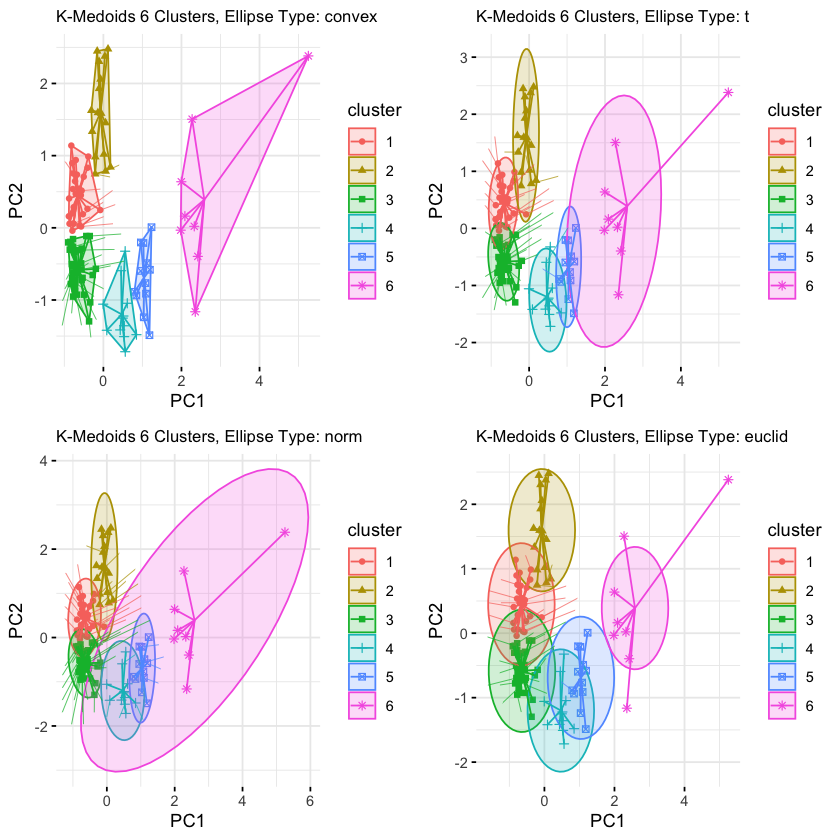

In [17]:
pam_res_6 <- pam(scaled_pca_data, 6, nstart=25) 
ellipse_types <- c("convex", "t", "norm", "euclid")
pam_6plots <- list()

for (etype in ellipse_types) {
  p <- fviz_cluster(pam_res_6, data = scaled_pca_data,
                    ellipse.type = etype, 
                    star.plot = TRUE, 
                    repel = TRUE, 
                    labelsize = 0, 
                    ggtheme = theme_minimal()
  ) + labs(title = paste("K-Medoids 6 Clusters, Ellipse Type:", etype)) +
      theme(plot.title = element_text(size = 10))
  pam_6plots[[etype]] <- p
}

grid.arrange(grobs = pam_6plots, ncol = 2)

The plots display the K-Medoids clustering results with 6 clusters using different types of ellipses (convex, t, norm, and euclid) to visualize the cluster boundaries.

The introduction of the sixth cluster further increases the overlapping compared to the 5-cluster solution. This additional overlap suggests more complexity and less clear distinction between some clusters. Given that the majority of methods did not strongly recommend 6 clusters, the resulting separation is not optimal. The increased overlapping indicates that the addition of the sixth cluster does not provide a meaningful improvement in clustering quality and supports the conclusion that 6 clusters may not be the best choice for this dataset.


## FOR 7 CLUSTERS


Too few points to calculate an ellipse

Too few points to calculate an ellipse

Too few points to calculate an ellipse


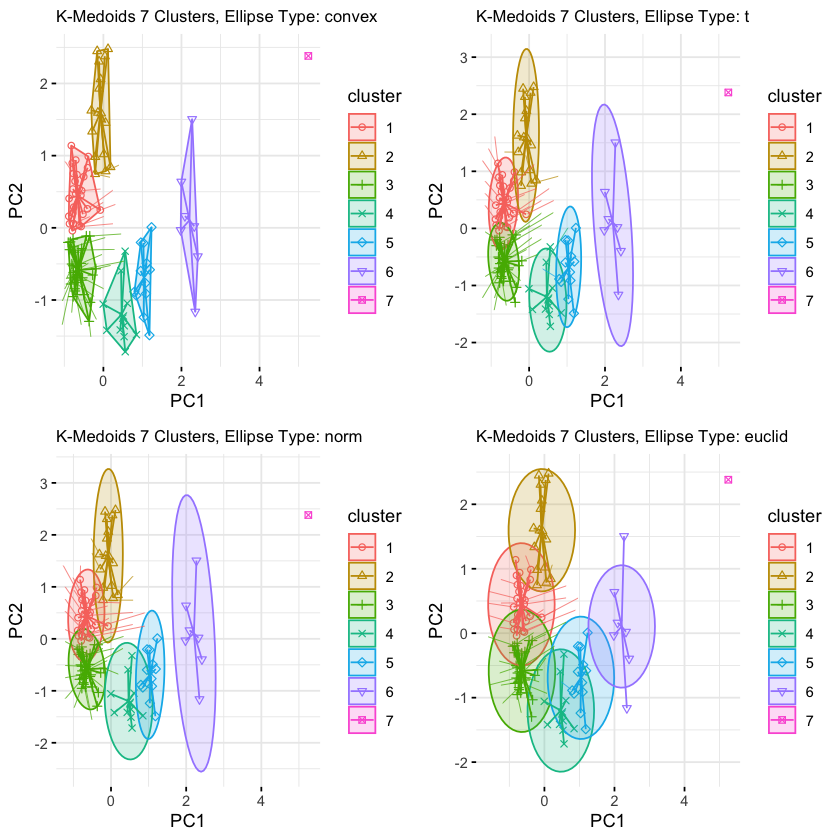

In [18]:
pam_res_7 <- pam(scaled_pca_data, 7, nstart=25) 
ellipse_types <- c("convex", "t", "norm", "euclid")
pam_7plots <- list()

for (etype in ellipse_types) {
  p <- fviz_cluster(pam_res_7, data = scaled_pca_data,
                    ellipse.type = etype, 
                    star.plot = TRUE, 
                    repel = TRUE, 
                    labelsize = 0, 
                    ggtheme = theme_minimal()
  ) + labs(title = paste("K-Medoids 7 Clusters, Ellipse Type:", etype)) +
      theme(plot.title = element_text(size = 10))
  pam_7plots[[etype]] <- p
}

grid.arrange(grobs = pam_7plots, ncol = 2)

The plots display the K-Medoids clustering results with 7 clusters using different types of ellipses (convex, t, norm, and euclid) to visualize the cluster boundaries.

Despite the support from three statistical methods suggesting the use of 7 clusters, the resulting plot shows that cluster 103 is isolated as a single-member cluster. This formation of a single-element cluster is not practical and indicates poor clustering. Therefore, even though 7 clusters were statistically recommended, the formation of a single-member cluster makes it an unsuitable choice for this dataset.


# CONCLUSION

The methods for determining the optimal number of clusters most frequently suggested 4 and 7 clusters. However, the 7-cluster solution resulted in the formation of a single-member cluster, making it an impractical choice. The 6-cluster solution was not strongly recommended by the methods and introduced more overlapping compared to fewer clusters. The 5-cluster solution also increased the overlap compared to the 4-cluster solution. Therefore, for K-Medoids clustering, the 4-cluster solution will be taken forward for further evaluation in the final notebook.